https://drive.google.com/file/d/1_M1Kk5Ph10c9SUGqDtZwsjqN_7ALcI_y/view?usp=sharing

**GARMENT WORKER PERFORMANCE PREDICTION**





#Importing the libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Loading dataset into a DataFrame

In [ ]:
df = pd.read_csv("/content/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
mean_value = df['wip'].mean()
df['wip'].fillna(mean_value, inplace=True)
print(df)
df.to_csv('updated_dataset.csv')

            date   quarter  department        day  team  \
0     01-01-2015  Quarter1      sweing   Thursday     8   
1     01-01-2015  Quarter1  finishing    Thursday     1   
2     01-01-2015  Quarter1      sweing   Thursday    11   
3     01-01-2015  Quarter1      sweing   Thursday    12   
4     01-01-2015  Quarter1      sweing   Thursday     6   
...          ...       ...         ...        ...   ...   
1192  03-11-2015  Quarter2   finishing  Wednesday    10   
1193  03-11-2015  Quarter2   finishing  Wednesday     8   
1194  03-11-2015  Quarter2   finishing  Wednesday     7   
1195  03-11-2015  Quarter2   finishing  Wednesday     9   
1196  03-11-2015  Quarter2   finishing  Wednesday     6   

      targeted_productivity    smv          wip  over_time  incentive  \
0                      0.80  26.16  1108.000000       7080         98   
1                      0.75   3.94  1190.465991        960          0   
2                      0.80  11.41   968.000000       3660         50   

In [ ]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


#Data preprocessing

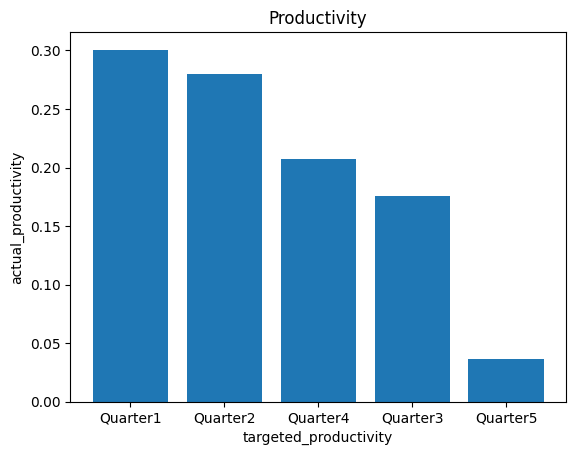

The data is imbalanced.
Imbalanced classes: Quarter5    0.036759
Name: quarter, dtype: float64


In [ ]:
class_counts = df['quarter'].value_counts()
total_instances = len(df)

# Calculate proportions
class_proportions = class_counts / total_instances
plt.bar(class_proportions.index, class_proportions.values)
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Productivity')
plt.show()

# Check if the data is imbalanced based on a threshold (e.g., 10%)
threshold = 0.1
imbalanced_classes = class_proportions[class_proportions < threshold]

if imbalanced_classes.empty:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")
    print("Imbalanced classes:", imbalanced_classes)



In [ ]:
value_to_remove = 'Quarter5'
column_name = 'quarter'
df = df[df['quarter'] != 'Quarter5']

# Save the updated dataset
df.to_csv('updated_dataset.csv')

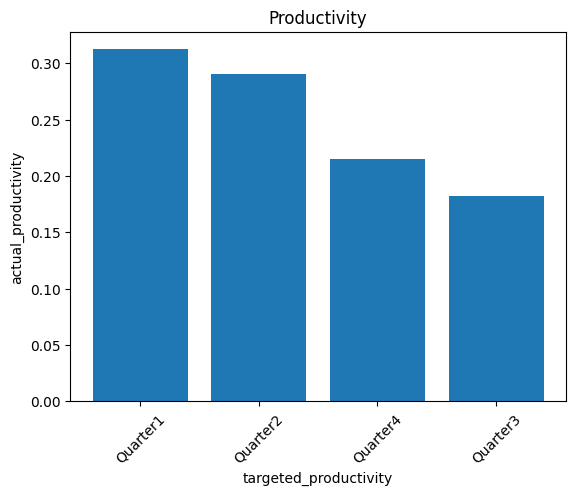

The data is balanced.


In [ ]:
class_counts = df['quarter'].value_counts()
total_instances = len(df)

# Calculate proportions
class_proportions = class_counts / total_instances
plt.bar(class_proportions.index, class_proportions.values)
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Productivity')
plt.xticks(rotation=45)
plt.show()

# Check if the data is imbalanced based on a threshold (e.g., 10%)
threshold = 0.1
imbalanced_classes = class_proportions[class_proportions < threshold]

if imbalanced_classes.empty:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")
    print("Imbalanced classes:", imbalanced_classes)


In [ ]:
df.drop(columns=["date"],inplace=True)
df = df[df != 'date']
df.to_csv('updated_dataset.csv')
df

<ipython-input-9-8141e9cb9cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["date"],inplace=True)


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1153 non-null   object 
 1   department             1153 non-null   object 
 2   day                    1153 non-null   object 
 3   team                   1153 non-null   int64  
 4   targeted_productivity  1153 non-null   float64
 5   smv                    1153 non-null   float64
 6   wip                    1153 non-null   float64
 7   over_time              1153 non-null   int64  
 8   incentive              1153 non-null   int64  
 9   idle_time              1153 non-null   float64
 10  idle_men               1153 non-null   int64  
 11  no_of_style_change     1153 non-null   int64  
 12  no_of_workers          1153 non-null   float64
 13  actual_productivity    1153 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 135.1+ 

In [ ]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

#EDA

1. What is the size of the dataset

In [ ]:
df.shape

(1153, 14)

2. list out all the columns in the dataset.

In [ ]:
# Display the column names
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


3. Are there any missing values in the dataset, and how are they distributed?

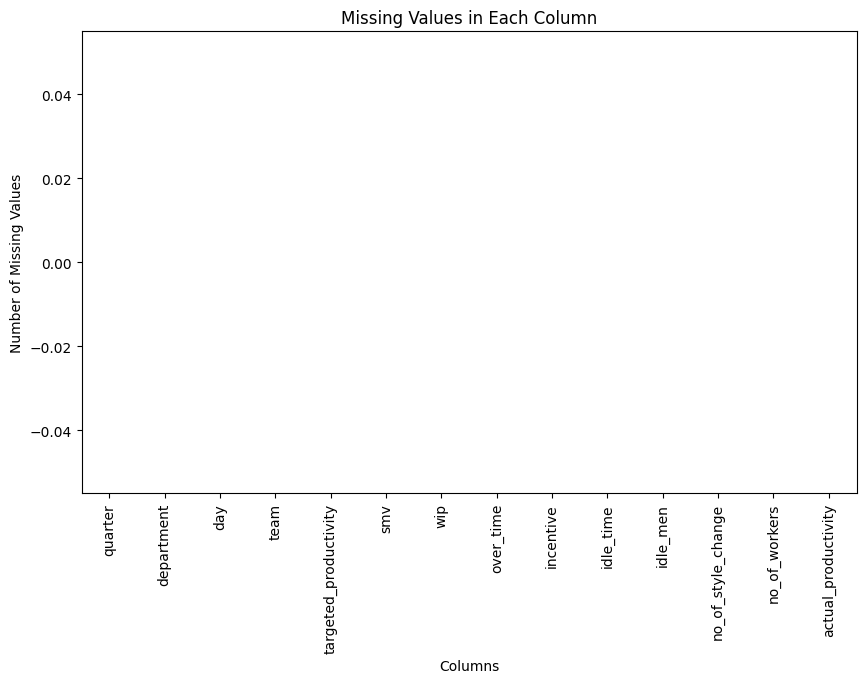

In [ ]:
missing_values = df.isnull()
missing_count = missing_values.sum()
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

4. What are the pairwise correlations between numerical variables?

In [ ]:
numerical_variables = ['smv', 'no_of_workers', 'actual_productivity']

# Calculate the correlation matrix
correlation_matrix = df[numerical_variables].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          smv  no_of_workers  actual_productivity
smv                  1.000000       0.912059            -0.111627
no_of_workers        0.912059       1.000000            -0.045641
actual_productivity -0.111627      -0.045641             1.000000


5. Can you visualize these correlations using a correlation matrix or a heatmap?

<ipython-input-16-cb26e8c778aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

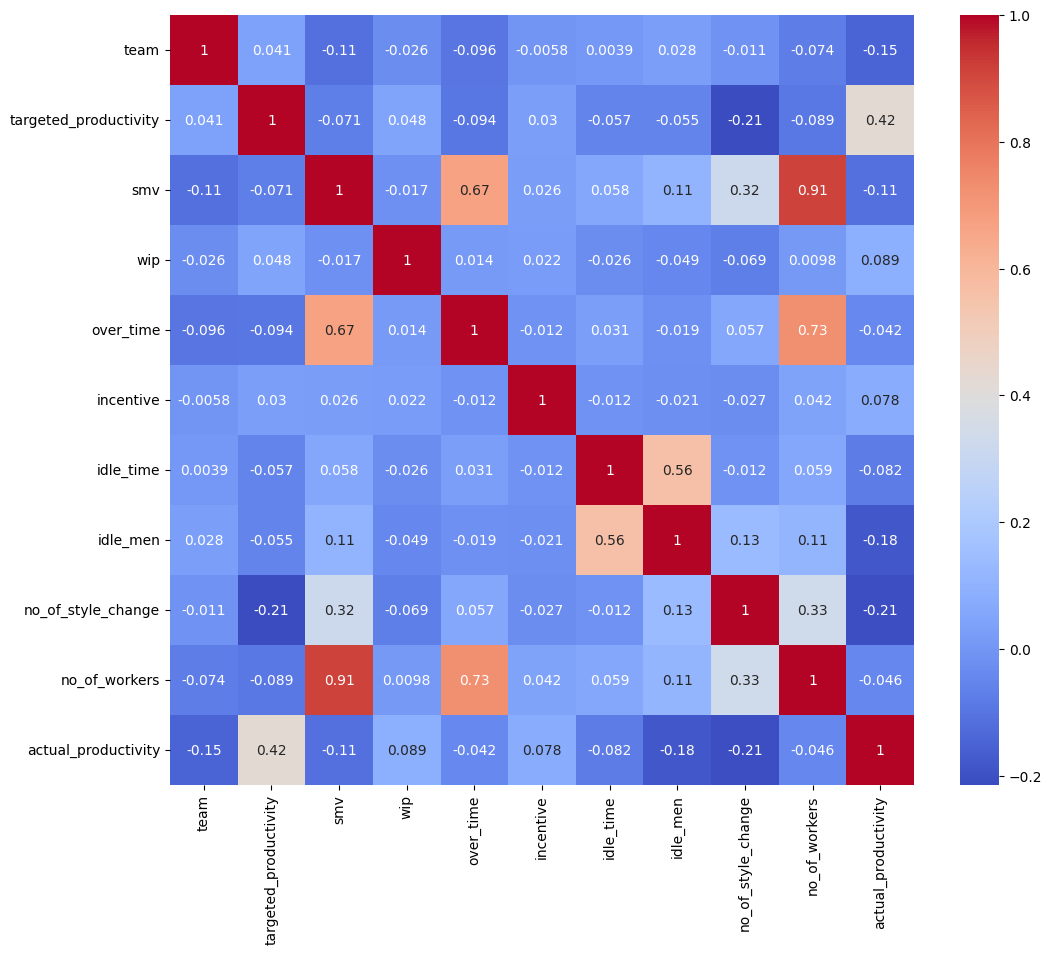

In [ ]:
corr = df.corr()
corr
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cbar=True,cmap='coolwarm')

6. number of empty values in the column

In [ ]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

7. Number of duplicated values in a column

In [ ]:
df.duplicated().sum()

0

8. plot a graph of actual productivity

Text(0.5, 1.0, 'GARMENT WORKER PERFORMANCE PREDICTION')

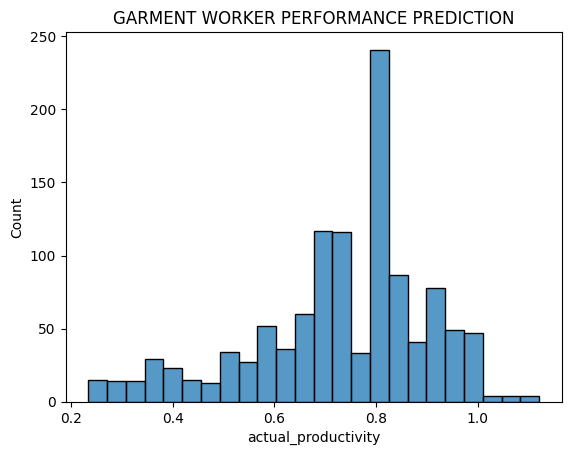

In [ ]:
ax = sns.histplot(df['actual_productivity'])
ax.set_title('GARMENT WORKER PERFORMANCE PREDICTION')

9. Scatter Plot of targeted productivity vs. actual Productivity

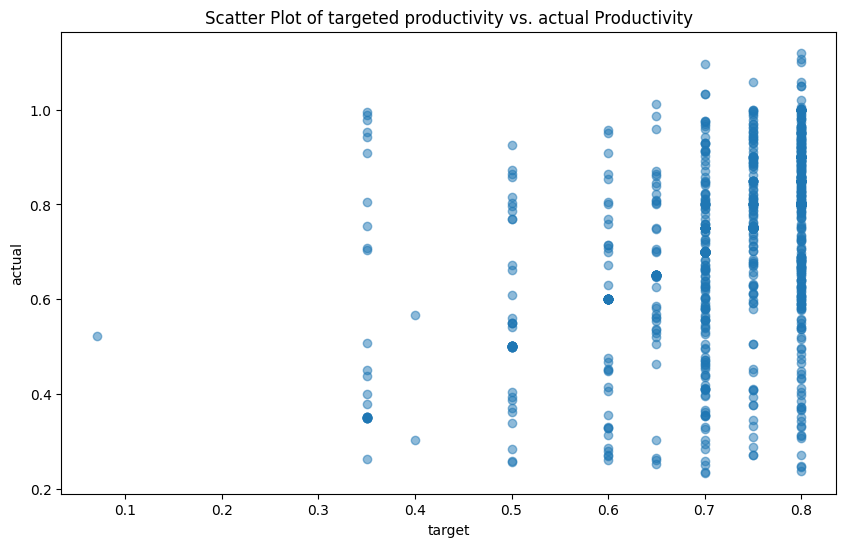

In [ ]:
x_column = 'targeted_productivity'
y_column = 'actual_productivity'

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(df[x_column], df[y_column], alpha=0.5)  # alpha controls point transparency
plt.title('Scatter Plot of targeted productivity vs. actual Productivity')
plt.xlabel('target')
plt.ylabel('actual')

plt.show()






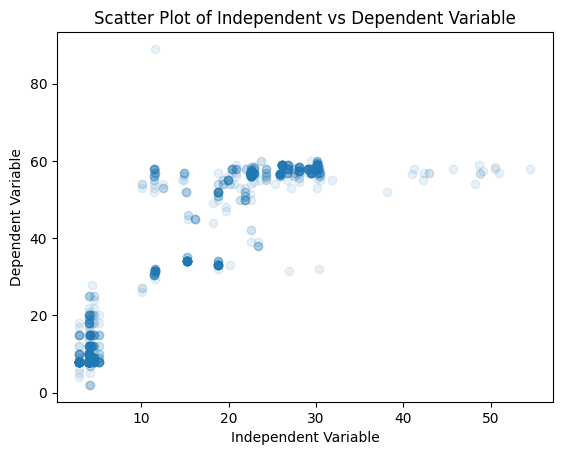

In [ ]:
x_column = 'smv'
y_column = 'no_of_workers'
plt.scatter(df[x_column], df[y_column], alpha=0.1)  # Set alpha for transparency
plt.title('Scatter Plot of Independent vs Dependent Variable')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

10.Workers in each quarter

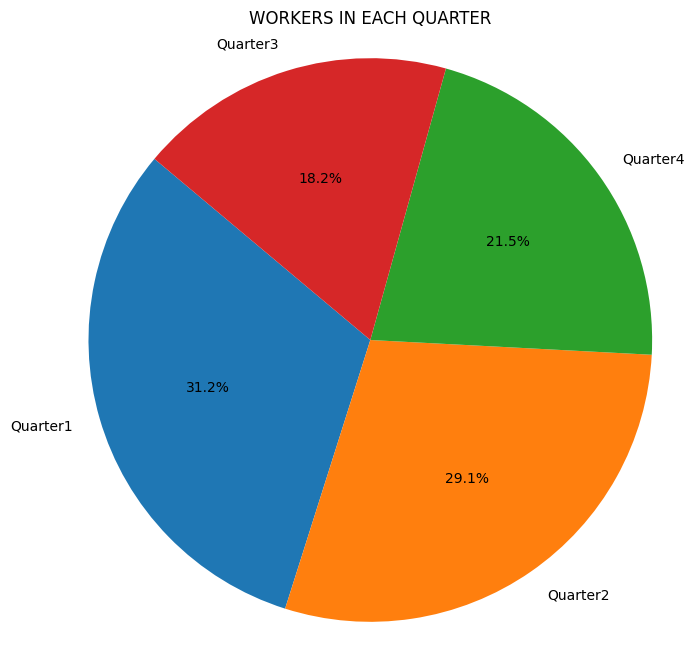

In [ ]:
# Specify the column for which you want to create the pie chart
category_column = 'quarter'

# Calculate the frequency of each category
category_counts = df[category_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('WORKERS IN EACH QUARTER')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
x= pd.get_dummies(df, drop_first=True)
print(x)

      team  targeted_productivity    smv          wip  over_time  incentive  \
0        8                   0.80  26.16  1108.000000       7080         98   
1        1                   0.75   3.94  1190.465991        960          0   
2       11                   0.80  11.41   968.000000       3660         50   
3       12                   0.80  11.41   968.000000       3660         50   
4        6                   0.80  25.90  1170.000000       1920         50   
...    ...                    ...    ...          ...        ...        ...   
1192    10                   0.75   2.90  1190.465991        960          0   
1193     8                   0.70   3.90  1190.465991        960          0   
1194     7                   0.65   3.90  1190.465991        960          0   
1195     9                   0.75   2.90  1190.465991       1800          0   
1196     6                   0.70   2.90  1190.465991        720          0   

      idle_time  idle_men  no_of_style_change  no_o

In [ ]:
x

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,0,1
1193,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,0,1
1194,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,0,1
1195,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,...,1,0,0,0,0,0,0,0,0,1



**MULTI COLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range((X).shape[1])]
  return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,team,4.876367
1,targeted_productivity,38.472463
2,smv,18.954082
3,wip,1.781751
4,over_time,7.227785
5,incentive,1.134410
6,idle_time,1.508062
7,idle_men,1.610288
8,no_of_style_change,1.600775
9,no_of_workers,50.817043


**TRAIN AND TESTING**

In [ ]:
X=x.drop(["actual_productivity"],axis=1)
y=df["actual_productivity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**LINEAR REGRESSION**


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.02272740270862612
Root Mean Squared Error: 0.15075610338764436
R-squared: 0.22447734869678226


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.016230692130073797
Root Mean Squared Error: 0.1273997336342341
R-squared: 0.44616331419059874


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.027281460789396757
Root Mean Squared Error: 0.16517100468725363
R-squared: 0.06908012877390868


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03054245738314193
Root Mean Squared Error: 0.1747640048269149
R-squared: -0.042194210696133494


SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.029720585201005876
Root Mean Squared Error: 0.17239659277667257
R-squared: -0.014149629364338834


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

base_regressor = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)

bagging_regressor.fit(X_train, y_train)
predictions = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.029720585201005876
Root Mean Squared Error: 0.17239659277667257
R-squared: -0.014149629364338834


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.016096067223033438
Root Mean Squared Error: 0.12687027714572643
R-squared: 0.4507570931708851


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [ ]:
history = model.fit(X_train, y_train, epochs=700, validation_split=0.25, verbose=2)

Epoch 1/700
22/22 - 2s - loss: 0.1022 - mae: 0.2355 - val_loss: 0.0415 - val_mae: 0.1658 - 2s/epoch - 80ms/step
Epoch 2/700
22/22 - 0s - loss: 0.0336 - mae: 0.1408 - val_loss: 0.0304 - val_mae: 0.1314 - 226ms/epoch - 10ms/step
Epoch 3/700
22/22 - 0s - loss: 0.0261 - mae: 0.1250 - val_loss: 0.0306 - val_mae: 0.1314 - 146ms/epoch - 7ms/step
Epoch 4/700
22/22 - 0s - loss: 0.0216 - mae: 0.1147 - val_loss: 0.0299 - val_mae: 0.1400 - 355ms/epoch - 16ms/step
Epoch 5/700
22/22 - 0s - loss: 0.0212 - mae: 0.1142 - val_loss: 0.0272 - val_mae: 0.1285 - 319ms/epoch - 15ms/step
Epoch 6/700
22/22 - 0s - loss: 0.0174 - mae: 0.1004 - val_loss: 0.0284 - val_mae: 0.1397 - 169ms/epoch - 8ms/step
Epoch 7/700
22/22 - 0s - loss: 0.0164 - mae: 0.0965 - val_loss: 0.0265 - val_mae: 0.1203 - 85ms/epoch - 4ms/step
Epoch 8/700
22/22 - 0s - loss: 0.0167 - mae: 0.0975 - val_loss: 0.0304 - val_mae: 0.1271 - 71ms/epoch - 3ms/step
Epoch 9/700
22/22 - 0s - loss: 0.0177 - mae: 0.1004 - val_loss: 0.0272 - val_mae: 0.1221 

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

8/8 [==============================] - 0s 2ms/step - loss: 0.0287 - mae: 0.1147
Test MSE: 0.02865719608962536
Test MAE: 0.11467169225215912


In [ ]:
predictions = model.predict(X_test)
print(predictions.flatten())

8/8 [==============================] - 0s 4ms/step
[0.77072686 0.70935607 0.809697   0.6820543  0.79849124 0.8306053
 0.7409578  0.79013467 0.76343274 0.76238614 0.37521508 0.3997486
 0.7774624  0.7994657  0.9468013  0.7636656  0.8996596  0.60144764
 0.625111   0.12912208 0.6348148  0.74518436 0.6356016  0.759075
 0.58194065 0.85476774 0.92046636 0.7980776  0.72878826 0.9607163
 0.7596791  0.7028011  0.92092043 0.7864619  0.8231239  0.28413033
 0.7358299  0.788297   0.69037056 0.655249   0.7936245  0.67470026
 0.7598646  0.7688285  0.77407354 0.8472935  0.6404497  1.0245254
 0.5633765  0.7844195  0.6456771  0.8320465  0.5953816  0.6758292
 0.6683965  0.63260895 0.7697236  0.7649671  0.7519141  0.91467166
 0.88969034 0.7563426  0.69103384 0.84348696 0.7422917  0.8483532
 0.63900334 0.85364956 0.77308255 0.6606228  0.78611755 0.8026416
 0.6358529  0.5100298  0.7802239  0.8176028  0.696989   0.8132826
 0.4793284  0.7197931  0.6405849  0.79145944 0.57042074 0.7605312
 0.4536772  0.87492234

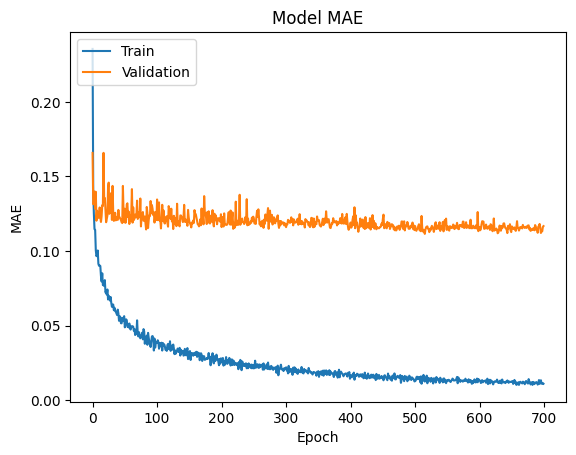

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


8/8 [==============================] - 0s 2ms/step


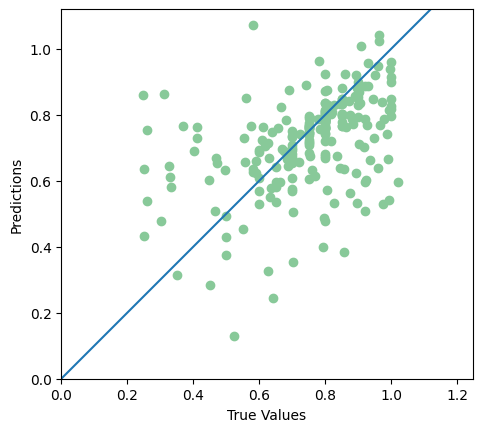

In [ ]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = '#88c999')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Load your dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset


# Assume the target variable is named 'target'


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Bagging': BaggingRegressor(),
    'Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse


report = pd.DataFrame(results.items(), columns=['Algorithm', 'Mean Squared Error'])
report = report.sort_values(by='Mean Squared Error', ascending=True)
print(report)


           Algorithm  Mean Squared Error
6           Boosting            0.013934
4      Random Forest            0.014619
5            Bagging            0.015667
2  Linear Regression            0.022149
1      Decision Tree            0.024489
0                KNN            0.028065
3                SVM            0.029309
7     Neural Network            8.148402
